In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import pylab 

data = pd.read_csv('podol_final2.csv')
data = data.drop(columns='Unnamed: 0')
data=data.fillna(0)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname = "/Library/Fonts/AppleGothic.ttf").get_name()
print(font_name)

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

AppleGothic


In [3]:
data.columns[:40]

Index(['CLAC3_NM', 'CLAC2_NM', 'CLAC1_NM', 'NUM_PD_C', 'NUM_CLNT_ID',
       'NUM_CLSE_ID', 'NUM_BRA_NM', 'TOT_HITS', 'TOT_PROFIT', 'TOT_SALES',
       'AVG_HITS', 'AVG_PROFIT', 'F', 'M', 'AGE10', 'AGE20', 'AGE30', 'AGE40',
       'AGE50', 'AGE60', 'AGE70', 'AGE80', 'TOT_SESS_SEQ', 'TOT_PAGE_VIEW',
       'TOT_SESS_HOUR', 'AVG_SESS_SEQ', 'AVG_PAGE_VIEW', 'AVG_SESS_HOUR',
       'mobile', 'desktop', 'tablet', 'April', 'May', 'June', 'July', 'August',
       'September', 'ZON_Daejeon', 'ZON_Busan', 'ZON_Gyeonggi-do'],
      dtype='object')

In [4]:
data.head()

,CLAC3_NM,CLAC2_NM,CLAC1_NM,NUM_PD_C,NUM_CLNT_ID,NUM_CLSE_ID,NUM_BRA_NM,TOT_HITS,TOT_PROFIT,TOT_SALES,...,CITY_Sancheong-gun,CITY_Hoengseong-gun,CITY_Cheongdo-gun,CITY_Goesan-gun,CITY_Jindo-gun,CITY_Gurye-gun,CITY_Cheongyang-gun,CITY_(not set),CITY_Gunwi-gun,CITY_Masan
0,2단우산,우산/양산류,패션잡화,23,122,129,14,15827,2531000,206,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3단우산,우산/양산류,패션잡화,247,1094,1156,31,117125,22862780,1637,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BB/파운데이션/컴팩트류,메이크업,화장품/뷰티케어,2184,44162,55205,238,4340172,3529389070,69417,...,6.0,23.0,23.0,15.0,19.0,24.0,18.0,1.0,17.0,0.0
3,DIY가구,시공/DIY가구,가구,18,41,80,2,87140,309861485,1540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DIY완구,여아완구,완구,2,1,1,1,46,33000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.sort_values('TOT_SALES',ascending=False)[['CLAC3_NM','TOT_SALES']].head()

,CLAC3_NM,TOT_SALES
184,남성티셔츠,330276
552,여성원피스,157240
573,여성티셔츠/탑,144633
500,여성남방셔츠,122838
176,남성캐주얼바지,115926


> 남성티셔츠 판매량이 거의 2위랑 2배이상 차이난다

In [6]:
data.sort_values('TOT_PROFIT',ascending=False)[['CLAC3_NM','TOT_PROFIT']].head()

,CLAC3_NM,TOT_PROFIT
552,여성원피스,9828337704
184,남성티셔츠,8138731990
412,스킨케어세트,7487840106
528,여성숄더백,6450620389
500,여성남방셔츠,5339071130


> 가장 상품 판매량이 많은 상품군 = 남성 티셔츠  
가장 판매 수익이 많은 상품군 = 여성 원피스

## TOT PROFIT & TOT SALES 상관관계

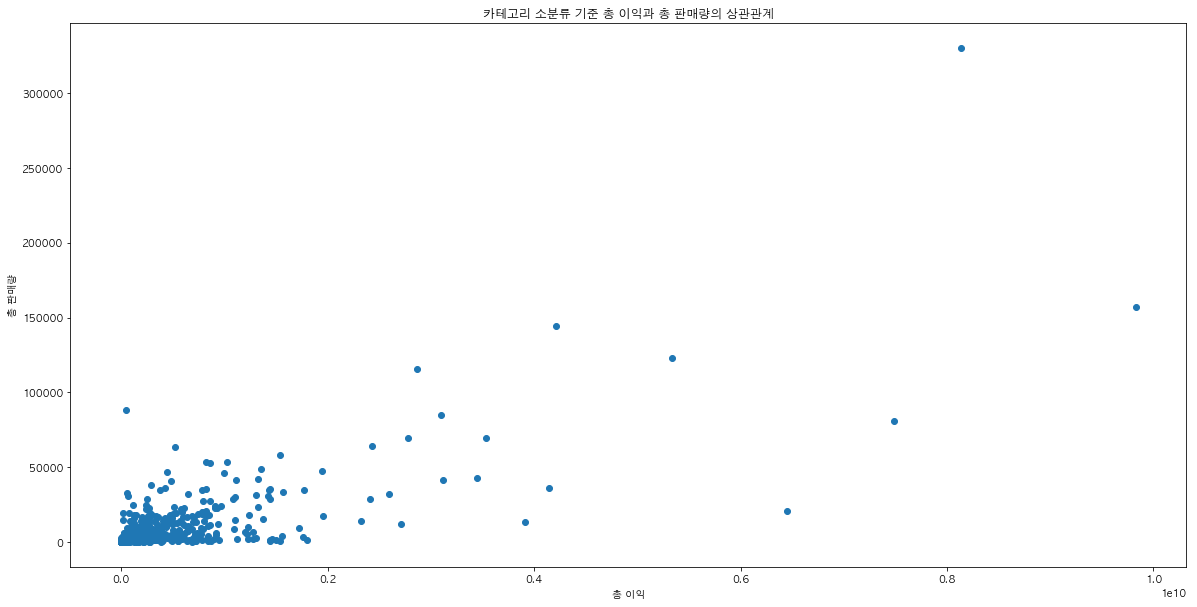

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(x=data['TOT_PROFIT'],y=data['TOT_SALES'])
plt.xlabel('총 이익')
plt.ylabel('총 판매량')
plt.title('카테고리 소분류 기준 총 이익과 총 판매량의 상관관계')

pylab.savefig('카테고리 소분류 기준 총 이익과 총 판매량의 상관관계.png')

In [8]:
data[['TOT_PROFIT','TOT_SALES']].corr('pearson')

,TOT_PROFIT,TOT_SALES
TOT_PROFIT,1.000000,0.758032
TOT_SALES,0.758032,1.000000


## -- 상품군별 총 수익과 판매량은 상관성이 크다

## 상품군 내 상품 개수 & 총 판매수 상관관계

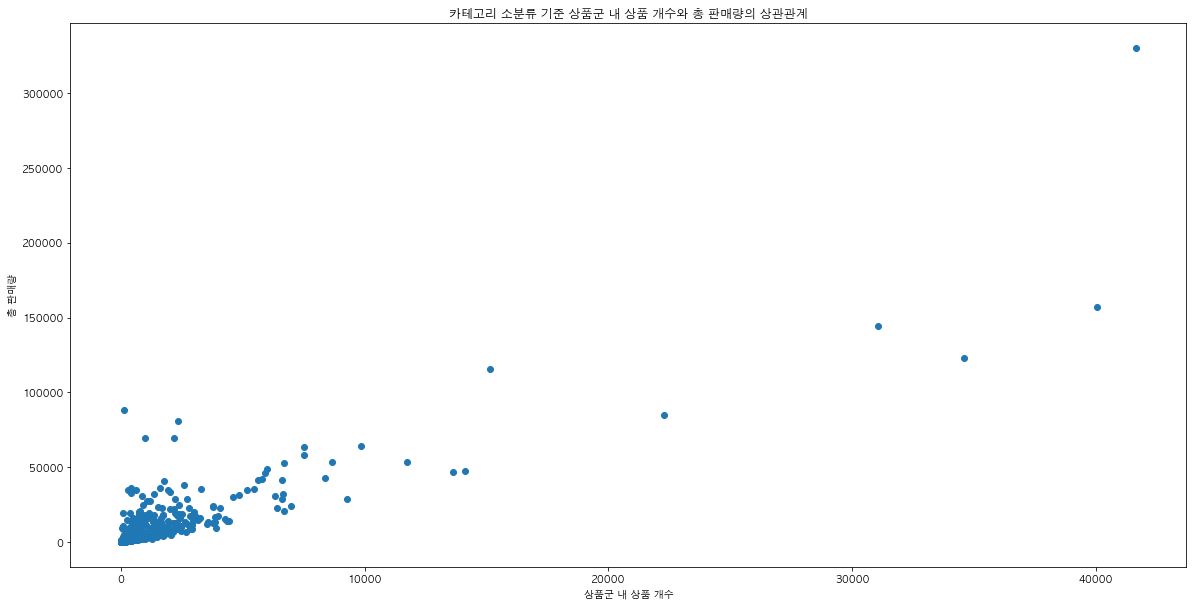

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(x=data['NUM_PD_C'],y=data['TOT_SALES'])
plt.xlabel('상품군 내 상품 개수')
plt.ylabel('총 판매량')
plt.title('카테고리 소분류 기준 상품군 내 상품 개수와 총 판매량의 상관관계')

pylab.savefig('카테고리 소분류 기준 상품군 내 상품 개수와 총 판매량의 상관관계.png')

Text(0.5, 1.0, '카테고리 소분류 기준 상품군 내 상품 개수와 평균 세션 시간의 상관관계')

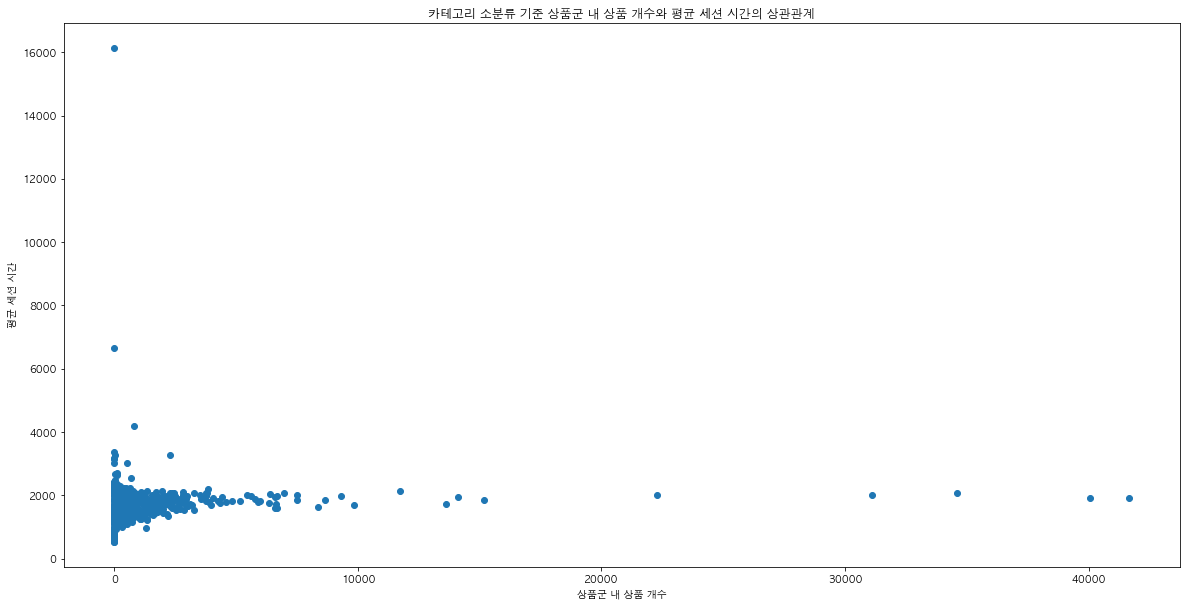

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(x=data['NUM_PD_C'],y=data['AVG_SESS_HOUR'])
plt.xlabel('상품군 내 상품 개수')
plt.ylabel('평균 세션 시간')
plt.title('카테고리 소분류 기준 상품군 내 상품 개수와 평균 세션 시간의 상관관계')


In [11]:
data[['NUM_PD_C','AVG_SESS_HOUR']].corr('pearson')

,NUM_PD_C,AVG_SESS_HOUR
NUM_PD_C,1.000000,0.065713
AVG_SESS_HOUR,0.065713,1.000000


Text(0.5, 1.0, '카테고리 소분류 기준 상품군 내 상품 개수와 총 세션 시간의 상관관계')

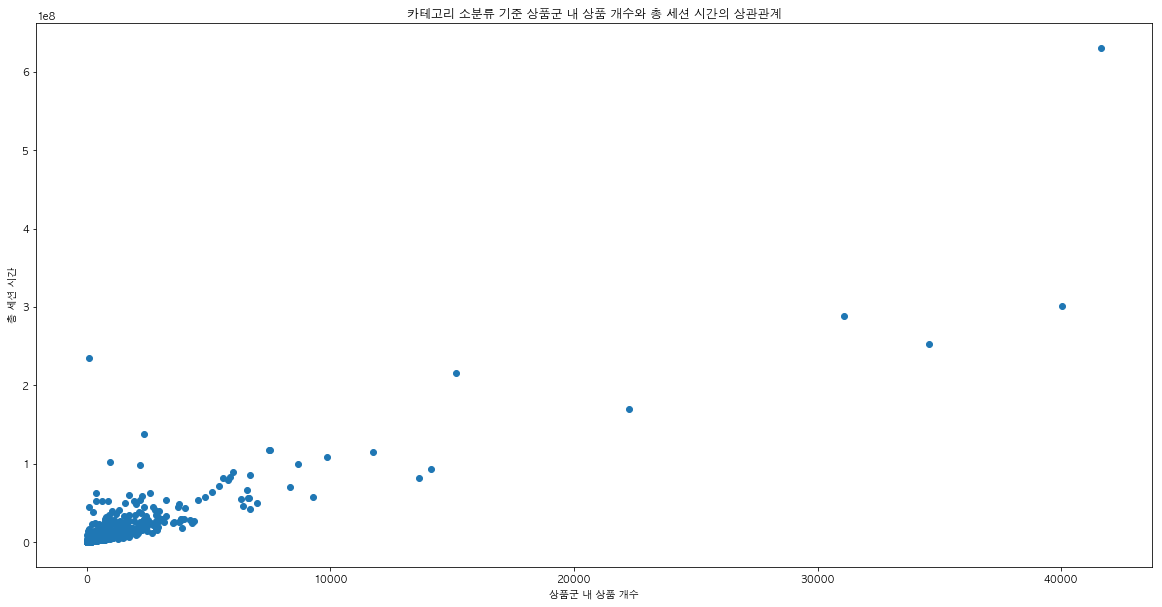

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(x=data['NUM_PD_C'],y=data['TOT_SESS_HOUR'])
plt.xlabel('상품군 내 상품 개수')
plt.ylabel('총 세션 시간')
plt.title('카테고리 소분류 기준 상품군 내 상품 개수와 총 세션 시간의 상관관계')

In [13]:
data[['NUM_PD_C','TOT_SESS_HOUR']].corr('pearson')

,NUM_PD_C,TOT_SESS_HOUR
NUM_PD_C,1.000000,0.886028
TOT_SESS_HOUR,0.886028,1.000000


In [14]:
data[['NUM_PD_C','TOT_SALES']].corr('pearson')

,NUM_PD_C,TOT_SALES
NUM_PD_C,1.000000,0.873097
TOT_SALES,0.873097,1.000000


## - 상품군 내 상품 개수와 판매수는 상관성이 크다 

## 소분류 기준 남녀 판매량

In [15]:
gender = data[['CLAC3_NM','CLAC2_NM','CLAC1_NM','F','M']]
gender['category_name'] = gender['CLAC3_NM'] + ' < '+ gender['CLAC2_NM'] + ' < ' + gender['CLAC1_NM']
gender['total'] = gender['F']+gender['M']
gender = gender.sort_values(['CLAC1_NM','CLAC2_NM','total'])


/Users/YiYoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/YiYoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


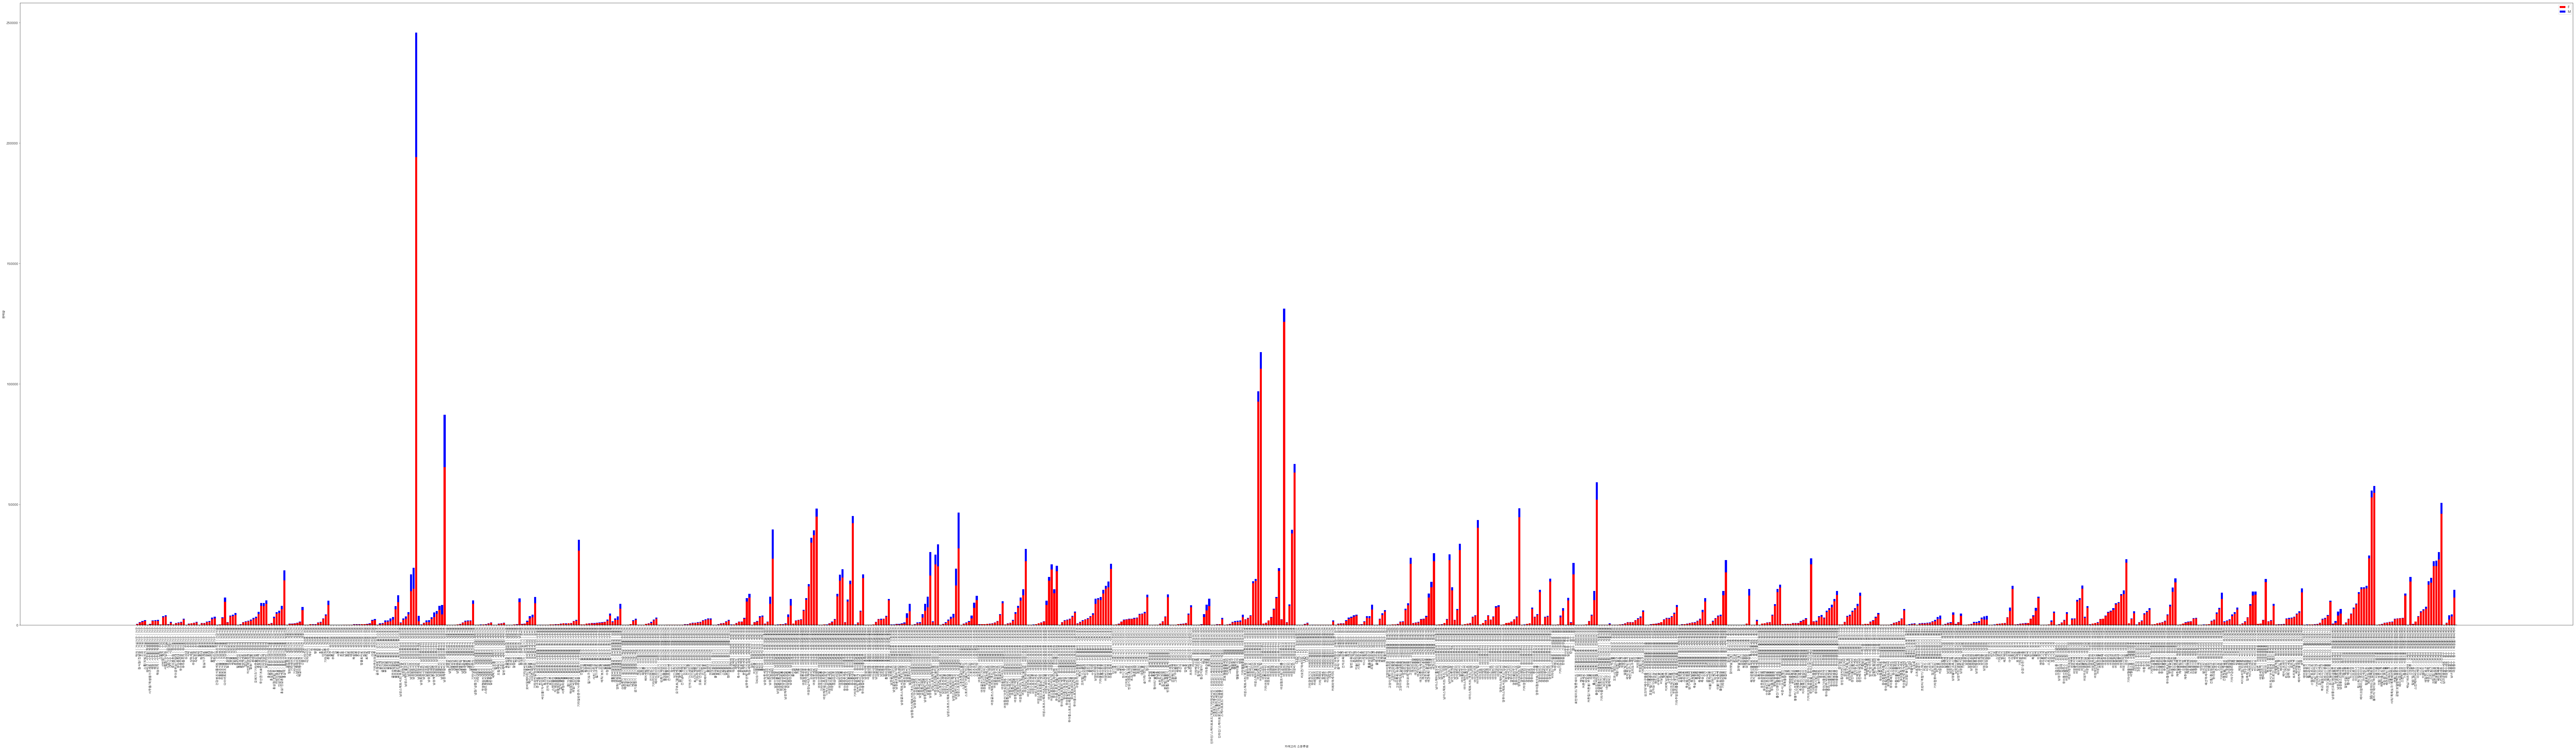

In [16]:
A = gender['F']
B = gender['M']

X = range(len(gender))

fig, ax= plt.subplots(figsize=(160,40))
ax.bar(X, A, color = 'r',label='F')
ax.bar(X, B, color = 'b', bottom = A, label='M')

plt.xticks(range(len(gender['category_name'].unique())), np.asarray(gender['category_name']), rotation =90)
plt.hlines(0,0,len(gender['category_name'].unique()))
plt.xlabel('카테고리 소분류명')
plt.ylabel('판매량')
plt.legend()
pylab.savefig('소분류 기준 상품군 남녀 판매량.png')


## 소상품군별 여성과 남성의 비율

In [17]:
f = [i if pd.notnull(i) else 0 for i in data['F']]
m = [i if pd.notnull(i) else 0 for i in data['M']]
gender_sum = [x + y for x,y in zip(f,m)]

F2= [round(x/ y,2) if y != 0 else 0 for x,y in zip(data['F'],gender_sum)]
M2= [round(x/ y,2)  if y != 0 else 0 for x,y in zip(data['M'],gender_sum)]

In [18]:

gender_df = pd.concat([data[['CLAC3_NM','CLAC2_NM','CLAC1_NM']],data['F'],data['M'],pd.DataFrame(F2),pd.DataFrame(M2)],axis=1)
gender_df.columns=['CLAC3_NM','CLAC2_NM','CLAC1_NM','F','M','prop F','prop M']
gender_df = gender_df.sort_values(['CLAC1_NM','CLAC2_NM','prop M'])
gender_df['category_name'] = gender_df['CLAC3_NM'] + ' < '+ gender_df['CLAC2_NM'] + ' < ' + gender_df['CLAC1_NM']

### - 상품군별로 정렬

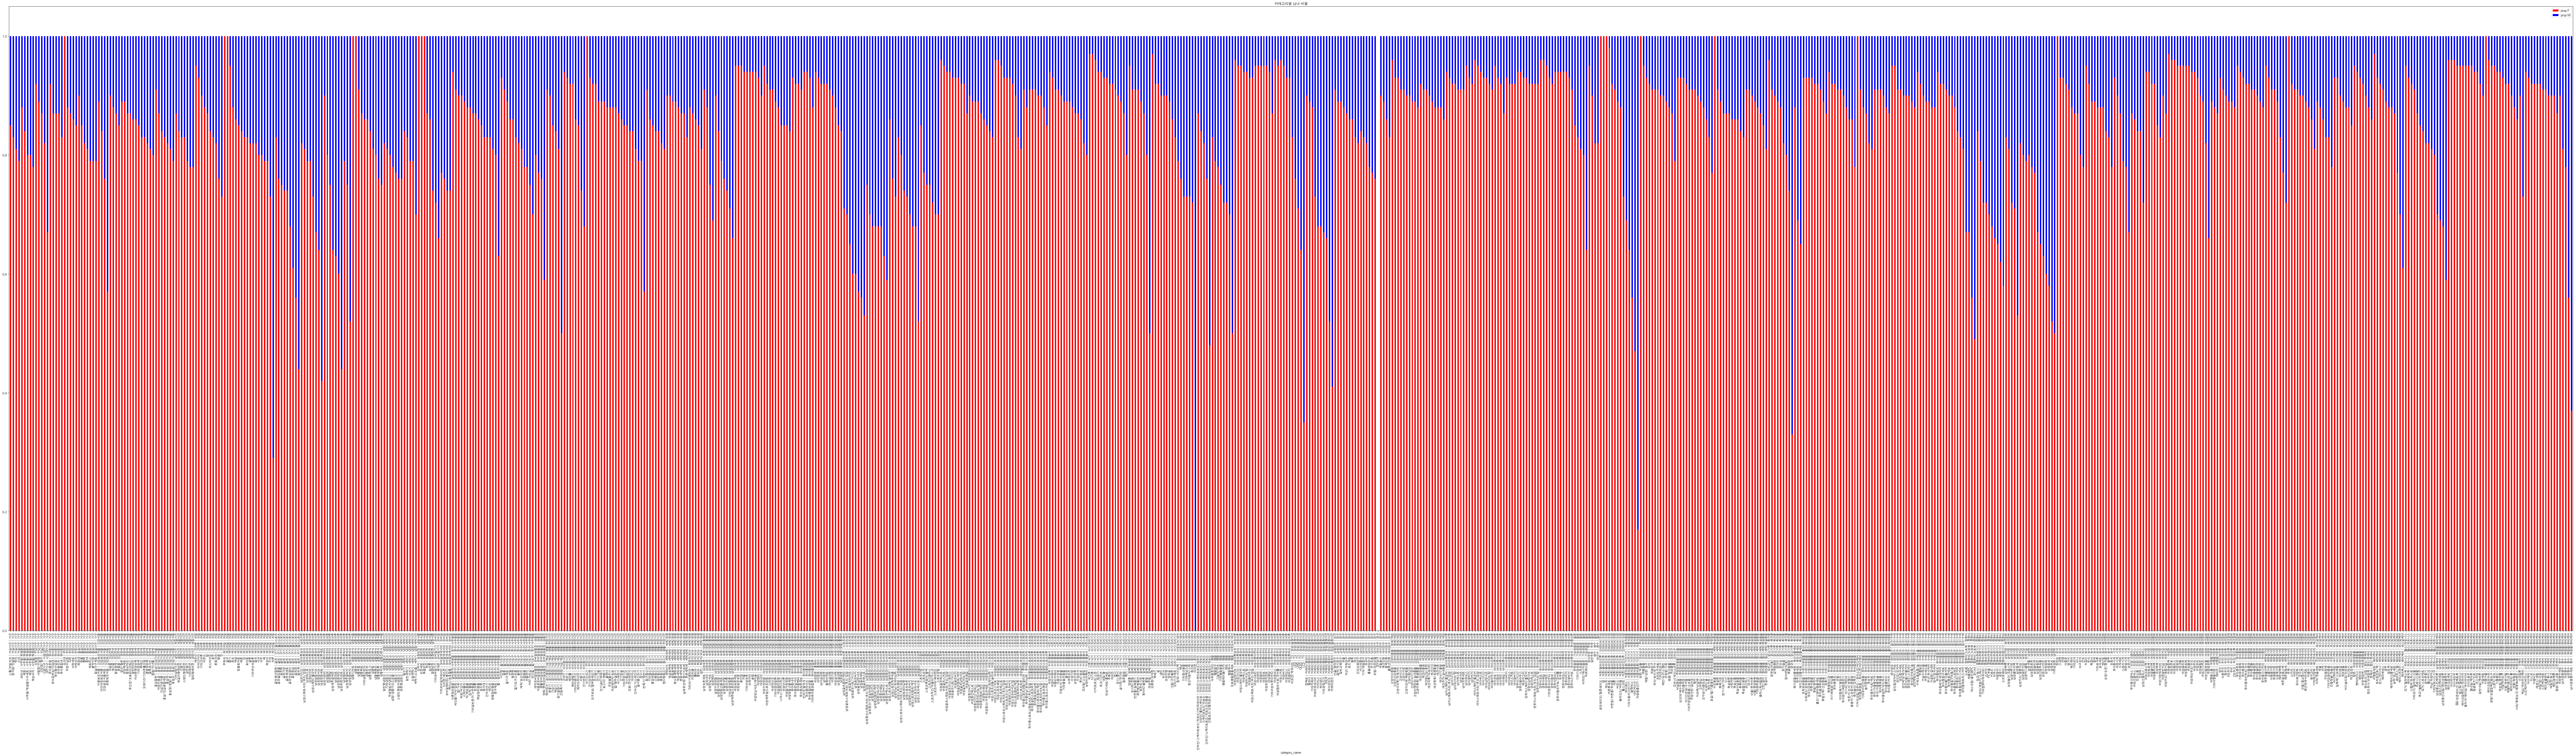

In [19]:


gender_df[['category_name','prop F','prop M']].plot.bar(x= 'category_name',y=['prop F','prop M'],
                                                        stacked = True,
                                                        figsize=(160,40),
                                                        color=['r','b'],
                                                       title='카테고리별 남녀 비율')

pylab.savefig('소분류 기준 상품군 남녀 판매량-stacked bar.png')

### - 남성 구매 비율로 내림차순 정렬

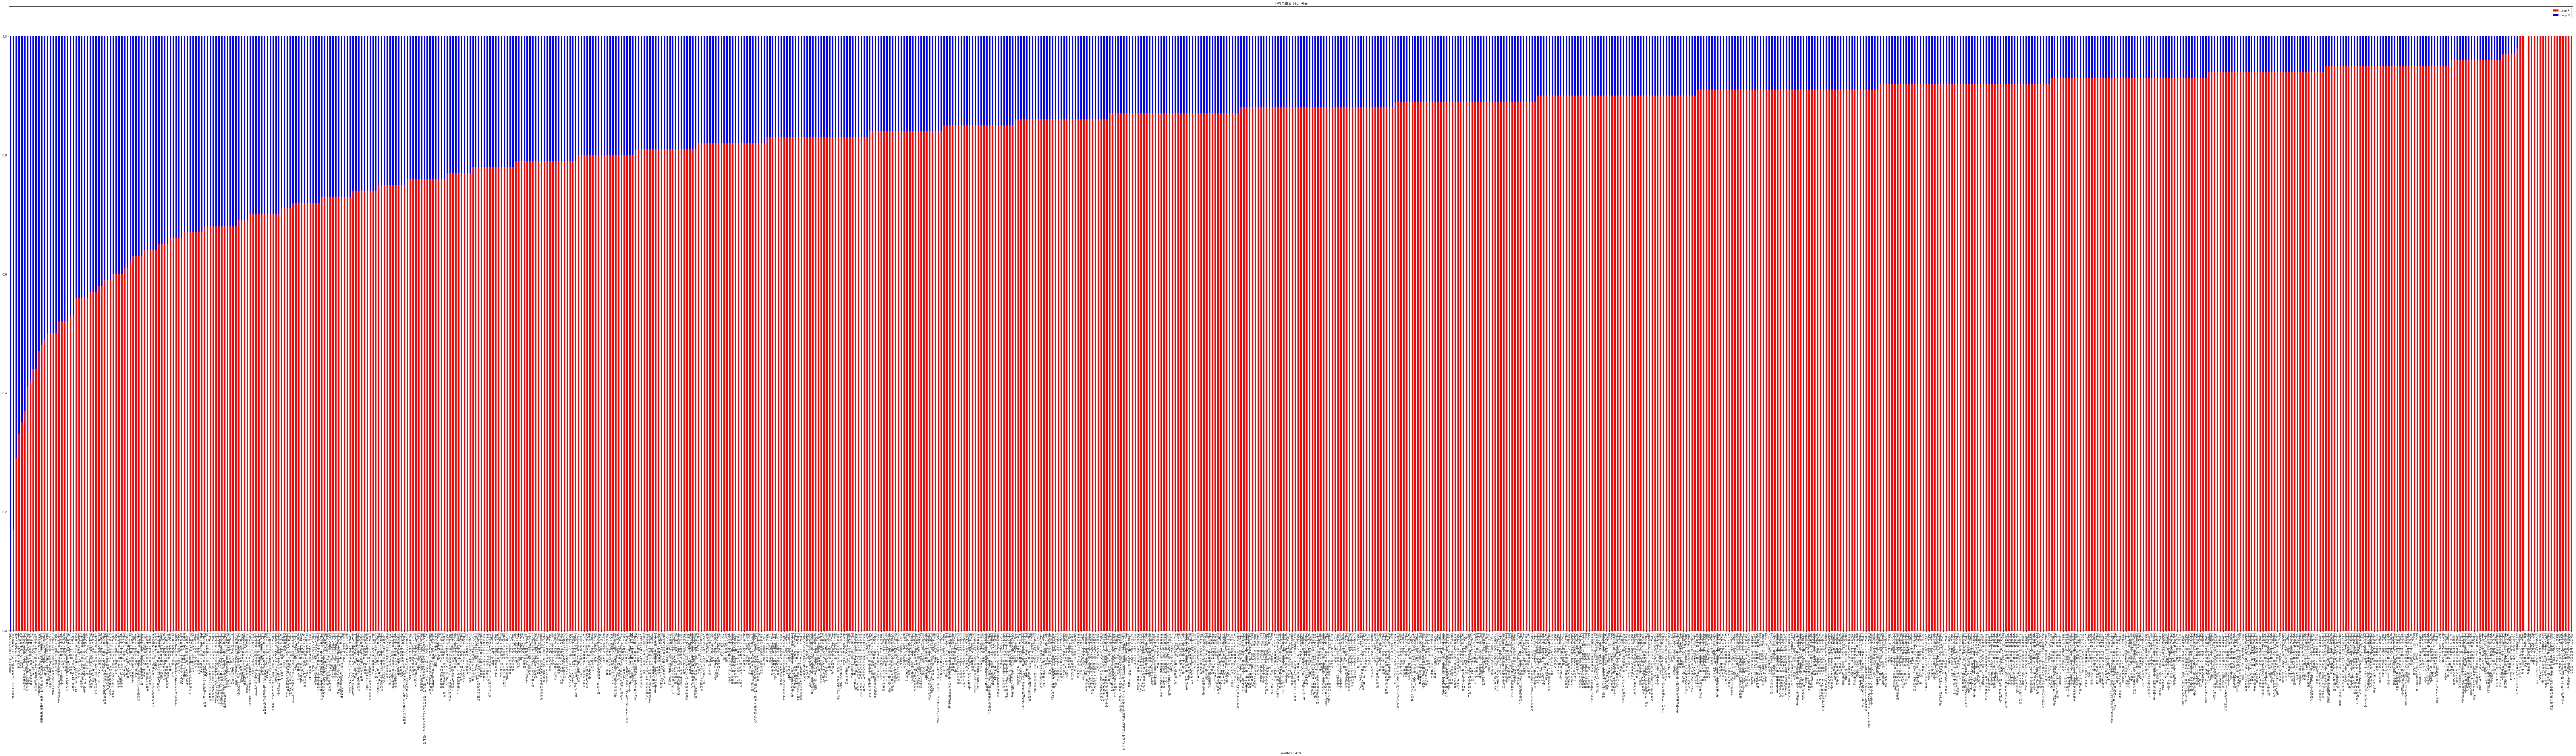

In [20]:
gender_df_m = gender_df[['category_name','prop F','prop M']].sort_values('prop M',ascending= False)

gender_df_m.plot.bar(x= 'category_name',y=['prop F','prop M'],
                                                        stacked = True,
                                                        figsize=(160,40),
                                                        color=['r','b'],
                                                       title='카테고리별 남녀 비율')

pylab.savefig('소분류 기준 상품군 남녀 판매량-stacked bar 내림차순.png')

### - 남성의 구매 비율이 높은 상품군

In [21]:

gender_df.sort_values('prop M',ascending=False).head(10).iloc[:,:-1]

,CLAC3_NM,CLAC2_NM,CLAC1_NM,F,M,prop F,prop M
458,아이젠,등산,아웃도어/레저,0.0,2.0,0.00,1.00
771,차량용충전기,자동차음향/가전기기,자동차용품,1.0,5.0,0.17,0.83
371,석류,국산과일,과일,2.0,5.0,0.29,0.71
228,닭근위,닭고기류,축산물,1.0,2.0,0.33,0.67
6,LCD,TV,영상/음향가전,7.0,13.0,0.35,0.65
105,남녀공용향수세트,향수,화장품/뷰티케어,7.0,12.0,0.37,0.63
790,카메라렌즈,카메라/캠코더,영상/음향가전,39.0,55.0,0.41,0.59
170,남성정장세트,남성의류세트,남성의류,1565.0,2195.0,0.42,0.58
37,골프채,골프,구기/필드스포츠,288.0,369.0,0.44,0.56
183,남성트렌치코트,남성의류아우터,남성의류,107.0,137.0,0.44,0.56


### - 여성의 구매 비율이 높은 상품군

In [22]:
gender_df.sort_values('prop F',ascending=False).head(30).iloc[:,:-1]

,CLAC3_NM,CLAC2_NM,CLAC1_NM,F,M,prop F,prop M
208,냉동면,냉동간편식,냉동식품,12.0,0.0,1.00,0.00
794,캐노피,커튼/블라인드류,인테리어/조명,8.0,0.0,1.00,0.00
321,방한모,모자,패션잡화,5.0,0.0,1.00,0.00
205,냉동디저트,냉동간편식,냉동식품,13.0,0.0,1.00,0.00
298,미용거울,미용소품,화장품/뷰티케어,4.0,0.0,1.00,0.00
288,무화과,국산과일,과일,5.0,0.0,1.00,0.00
359,살구,국산과일,과일,2.0,0.0,1.00,0.00
443,싱크대,주방가구,가구,3.0,0.0,1.00,0.00
251,로만쉐이드/벌룬쉐이드,커튼/블라인드류,인테리어/조명,2.0,0.0,1.00,0.00
313,발,커튼/블라인드류,인테리어/조명,2.0,0.0,1.00,0.00


## 성별별 상품군의 비율

In [23]:
f_sum = sum(f)
m_sum = sum(m)
F2 = [round(i/sum(f),4) for i in f]
M2 = [round(i/sum(f),4) for i in m]

In [24]:
gender_df = pd.concat([data['CLAC3_NM'],data['F'],data['M'],pd.DataFrame(F2),pd.DataFrame(M2)],axis=1)
gender_df.columns=['CLAC3_NM','F','M','prop F','prop M']

In [25]:
gender_df.sort_values('prop F',ascending=False).head(10)

,CLAC3_NM,F,M,prop F,prop M
184,남성티셔츠,194240.0,51595.0,0.0486,0.0129
552,여성원피스,125797.0,5428.0,0.0315,0.0014
573,여성티셔츠/탑,106396.0,6784.0,0.0266,0.0017
500,여성남방셔츠,92658.0,4295.0,0.0232,0.0011
176,남성캐주얼바지,65493.0,21704.0,0.0164,0.0054
515,여성바지,63270.0,3568.0,0.0158,0.0009
350,블러셔/쉐이딩/하이라이터,54832.0,2799.0,0.0137,0.0007
2,BB/파운데이션/컴팩트류,52915.0,2827.0,0.0132,0.0007
347,블라인드/버티컬,51974.0,7199.0,0.0130,0.0018
412,스킨케어세트,46153.0,4562.0,0.0115,0.0011


> 여성이 선호하는 상품군

In [26]:
gender_df.sort_values('prop M',ascending=False).head(10)

,CLAC3_NM,F,M,prop F,prop M
184,남성티셔츠,194240.0,51595.0,0.0486,0.0129
176,남성캐주얼바지,65493.0,21704.0,0.0164,0.0054
152,남성스포츠티셔츠,31743.0,14887.0,0.0079,0.0037
186,남성팬티,27471.0,12117.0,0.0069,0.0030
124,남성등산티셔츠,20542.0,9765.0,0.0051,0.0024
126,남성런닝/트레이닝화,24339.0,9167.0,0.0061,0.0023
171,남성정장셔츠,15071.0,8640.0,0.0038,0.0022
347,블라인드/버티컬,51974.0,7199.0,0.0130,0.0018
164,남성일반스포츠바지,16337.0,7031.0,0.0041,0.0018
115,남성남방셔츠,13983.0,7028.0,0.0035,0.0018


> 남성이 선호하는 상품군

## 중분류 기준 남녀 판매량

In [27]:
data2 = data.groupby(['CLAC2_NM']).sum()
data2.reset_index(inplace=True)

Text(0, 0.5, '판매량')

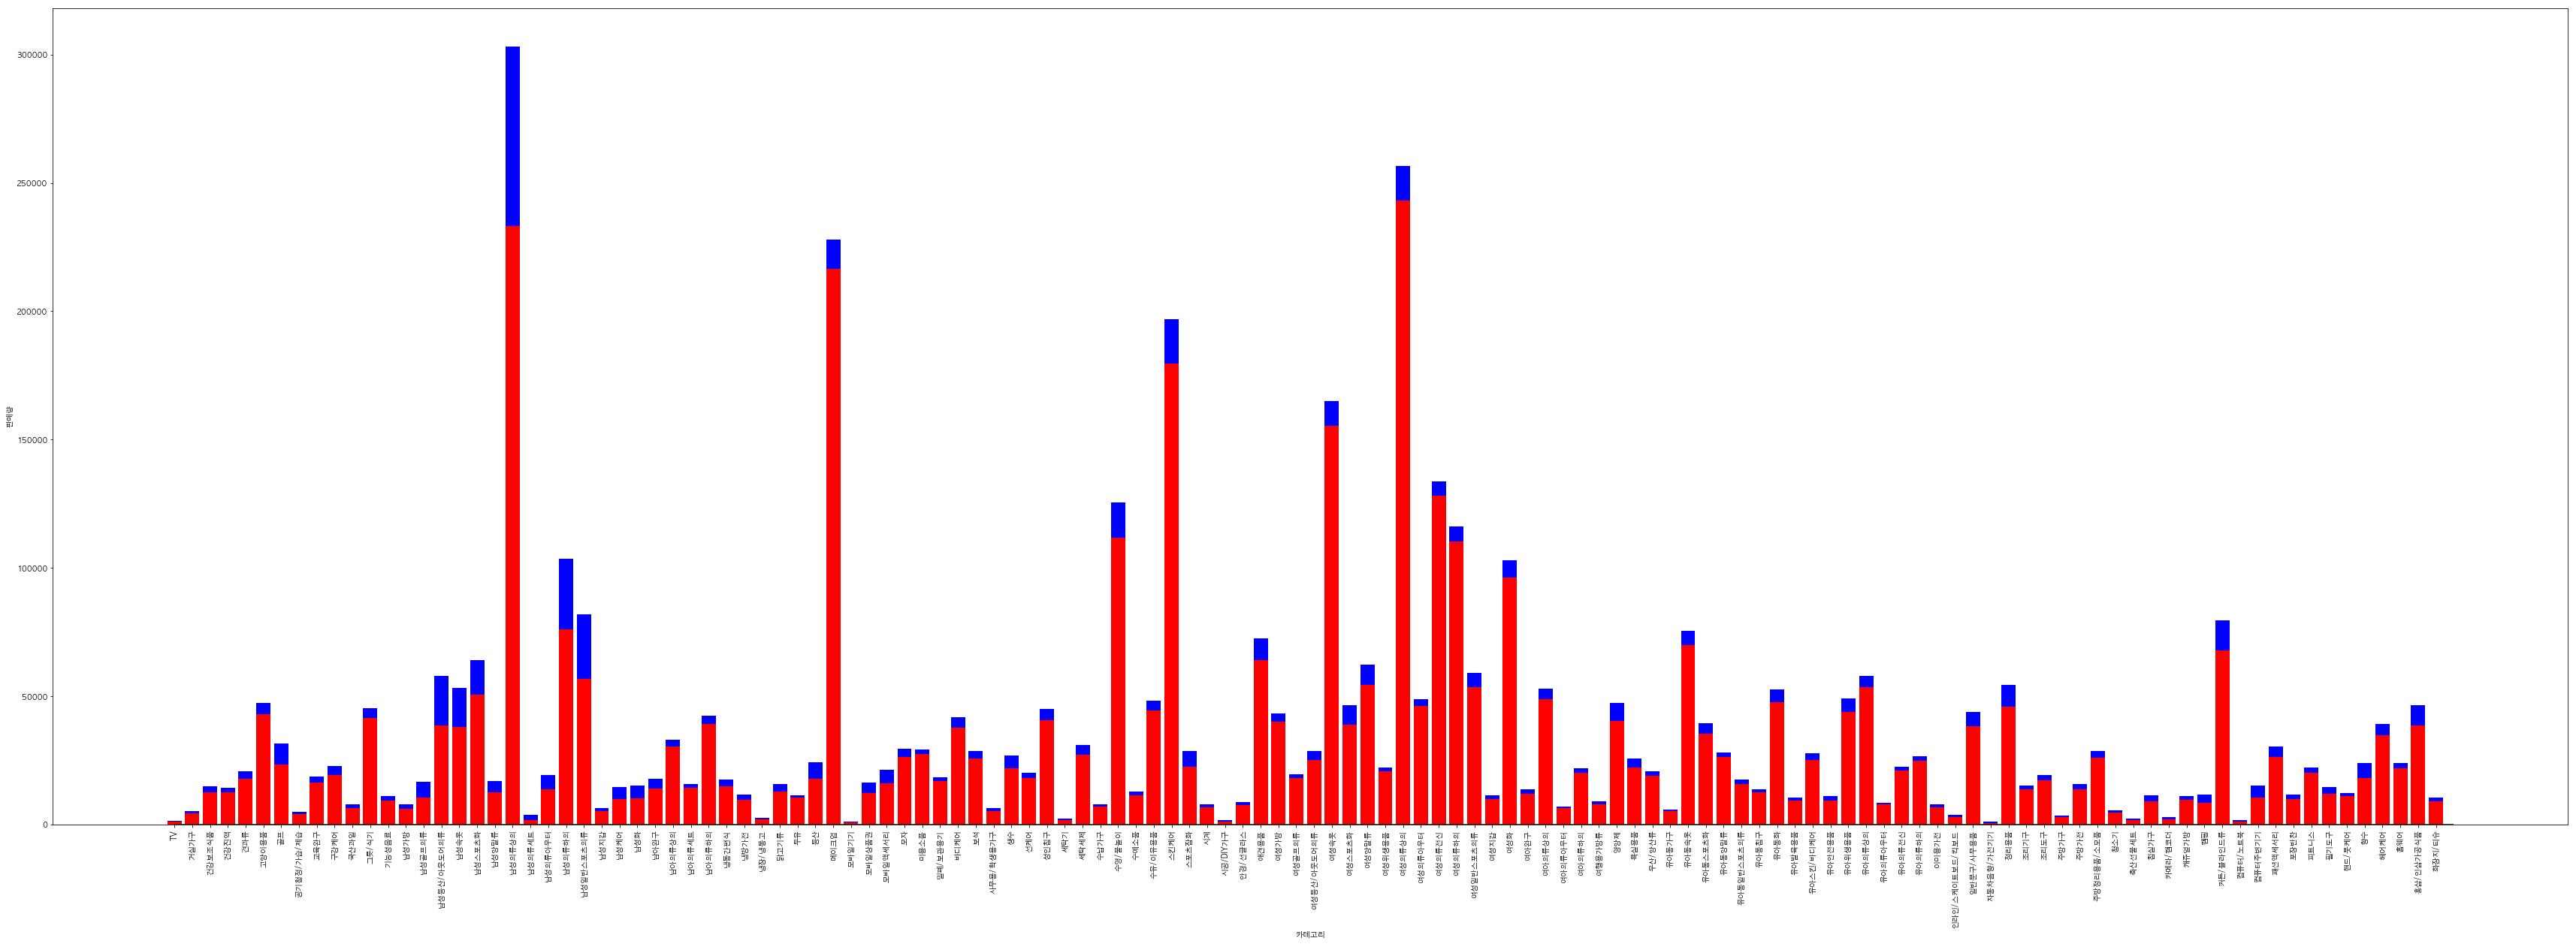

In [28]:
A = data2['F']
B = data2['M']

X = range(len(data2))

fig, ax= plt.subplots(figsize=(60,20))
ax.bar(X, A, color = 'r')
ax.bar(X, B, color = 'b', bottom = A)
plt.xticks(range(len(data2['CLAC2_NM'].unique())), np.asarray(data2['CLAC2_NM']), rotation =90)
plt.hlines(0,0,len(data2['CLAC2_NM'].unique()))
plt.xlabel('카테고리')
plt.ylabel('판매량')

pylab.savefig('중분류 기준 상품군 남녀 판매량.png')    

In [29]:
f = [i if pd.notnull(i) else 0 for i in data2['F']]
m = [i if pd.notnull(i) else 0 for i in data2['M']]
gender_sum = [x + y for x,y in zip(f,m)]

F2= [round(x/ y,2) if y != 0 else 0 for x,y in zip(data2['F'],gender_sum)]
M2= [round(x/ y,2)  if y != 0 else 0 for x,y in zip(data2['M'],gender_sum)]

In [30]:
gender_df = pd.concat([data2['CLAC2_NM'],data2['F'],data2['M'],pd.DataFrame(F2),pd.DataFrame(M2)],axis=1)
gender_df.columns=['CLAC2_NM','F','M','prop F','prop M']
gender_df.sort_values('prop M',ascending=False).head()

,CLAC2_NM,F,M,prop F,prop M
20,남성의류세트,1565.0,2195.0,0.42,0.58
102,자동차음향/가전기기,564.0,433.0,0.57,0.43
116,컴퓨터/노트북,1043.0,624.0,0.63,0.37
14,남성골프의류,10527.0,6132.0,0.63,0.37
26,남성화,10121.0,5170.0,0.66,0.34


In [31]:
f_sum = sum(f)
m_sum = sum(m)
F2 = [round(i/sum(f),4) for i in f]
M2 = [round(i/sum(f),4) for i in m]

In [32]:
gender_df = pd.concat([data2['CLAC2_NM'],data2['F'],data2['M'],pd.DataFrame(F2),pd.DataFrame(M2)],axis=1)
gender_df.columns=['CLAC2_NM','F','M','prop F','prop M']

In [33]:
gender_df.sort_values('prop F',ascending=False).head(10)

,CLAC2_NM,F,M,prop F,prop M
69,여성의류상의,243273.0,13450.0,0.0608,0.0034
19,남성의류상의,233113.0,69952.0,0.0583,0.0175
37,메이크업,216603.0,11223.0,0.0542,0.0028
56,스킨케어,179549.0,17468.0,0.0449,0.0044
65,여성속옷,155223.0,9784.0,0.0388,0.0024
71,여성의류전신,128087.0,5536.0,0.0320,0.0014
53,수영/물놀이,111815.0,13674.0,0.0280,0.0034
72,여성의류하의,110262.0,5798.0,0.0276,0.0014
75,여성화,96378.0,6686.0,0.0241,0.0017
22,남성의류하의,76048.0,27362.0,0.0190,0.0068


In [34]:
data3 = data.groupby(['CLAC1_NM']).sum()
data3.reset_index(inplace=True)

<BarContainer object of 37 artists>

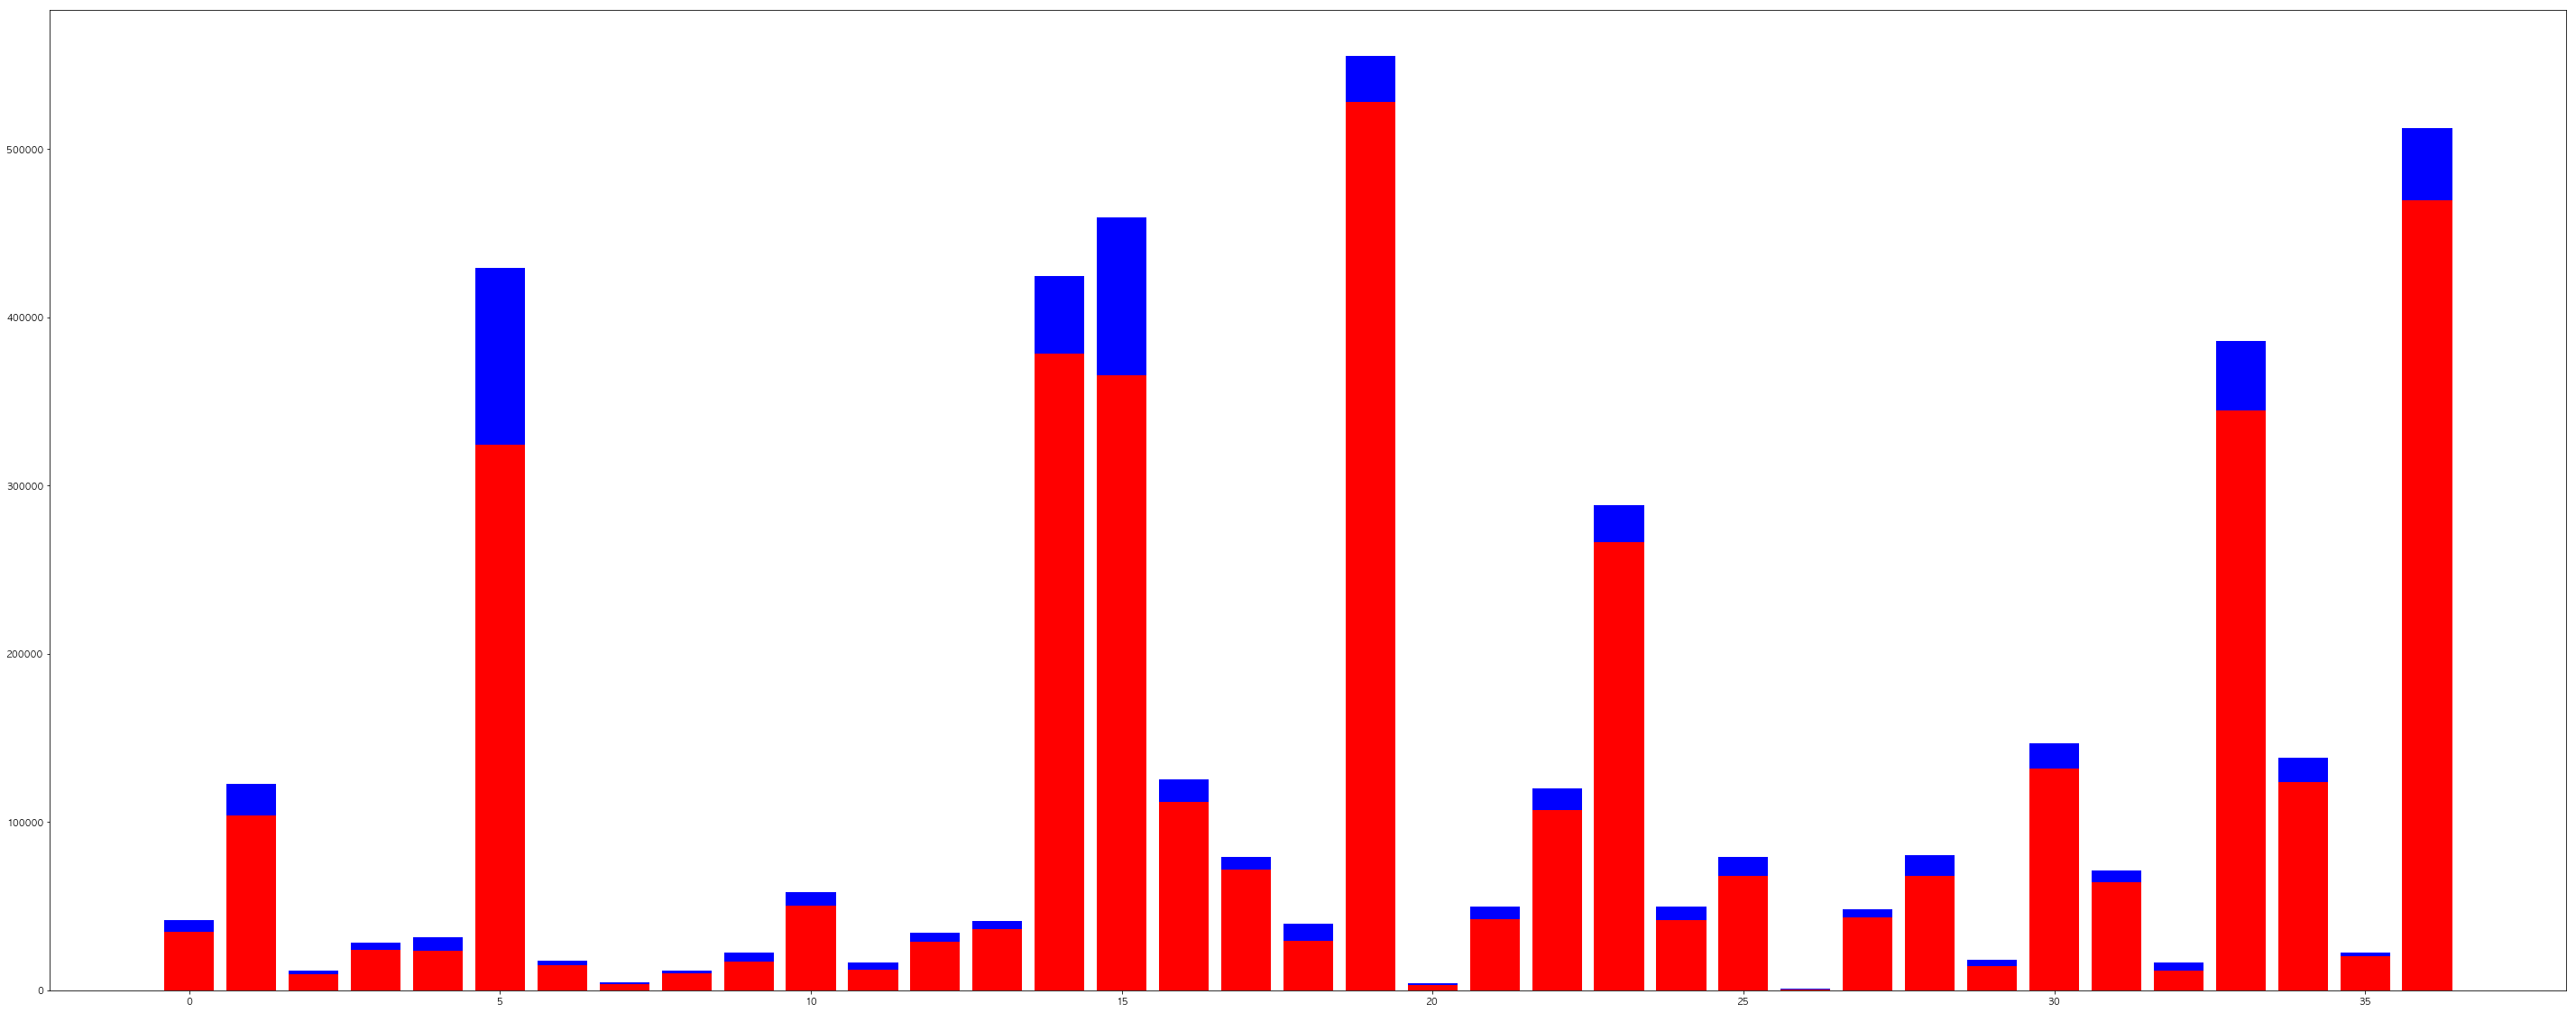

In [35]:
A = data3['F']
B = data3['M']

X = data3.index

fig, ax= plt.subplots(figsize=(50,20))
ax.bar(X, A, color = 'r')
ax.bar(X, B, color = 'b', bottom = A)

pylab.savefig('대분류 기준 상품군 남녀 판매량.png')

In [36]:
f = [i if pd.notnull(i) else 0 for i in data3['F']]
m = [i if pd.notnull(i) else 0 for i in data3['M']]
gender_sum = [x + y for x,y in zip(f,m)]

F2= [round(x/ y,2) if y != 0 else 0 for x,y in zip(data3['F'],gender_sum)]
M2= [round(x/ y,2)  if y != 0 else 0 for x,y in zip(data3['M'],gender_sum)]

In [37]:
gender_df = pd.concat([data3['CLAC1_NM'],data3['F'],data3['M'],pd.DataFrame(F2),pd.DataFrame(M2)],axis=1)
gender_df.columns=['CLAC1_NM','F','M','prop F','prop M']
gender_df.sort_values('prop M',ascending=False)

,CLAC1_NM,F,M,prop F,prop M
26,자동차용품,564.0,433.0,0.57,0.43
32,컴퓨터,11649.0,5110.0,0.70,0.30
20,영상/음향가전,3157.0,1157.0,0.73,0.27
18,아웃도어/레저,29205.0,10253.0,0.74,0.26
11,상품권,12092.0,4355.0,0.74,0.26
4,구기/필드스포츠,23240.0,8249.0,0.74,0.26
5,남성의류,324374.0,105115.0,0.76,0.24
9,모바일,16908.0,5442.0,0.76,0.24
7,냉장/세탁가전,3884.0,977.0,0.80,0.20
15,스포츠패션,365749.0,93674.0,0.80,0.20


> 상품군별 남녀 비율

In [38]:
f_sum = sum(f)
m_sum = sum(m)
F2 = [round(i/sum(f),4) for i in f]
M2 = [round(i/sum(f),4) for i in m]

In [39]:
gender_df = pd.concat([data3['CLAC1_NM'],data3['F'],data3['M'],pd.DataFrame(F2),pd.DataFrame(M2)],axis=1)
gender_df.columns=['CLAC1_NM','F','M','prop F','prop M']

In [40]:
gender_df.sort_values('prop M',ascending=False)

,CLAC1_NM,F,M,prop F,prop M
5,남성의류,324374.0,105115.0,0.0811,0.0263
15,스포츠패션,365749.0,93674.0,0.0915,0.0234
14,속옷/양말/홈웨어,378416.0,46217.0,0.0946,0.0116
36,화장품/뷰티케어,469477.0,43045.0,0.1174,0.0108
33,패션잡화,344438.0,41278.0,0.0861,0.0103
19,여성의류,527921.0,27240.0,0.1320,0.0068
23,유아동의류,266609.0,21849.0,0.0667,0.0055
1,건강식품,103728.0,19139.0,0.0259,0.0048
30,출산/육아용품,132024.0,14623.0,0.0330,0.0037
34,퍼스널케어,123609.0,14540.0,0.0309,0.0036


> 성별별 상품군 구매량 비율 

In [41]:
data[['CLAC3_NM','TOT_SALES']].sort_values('TOT_SALES',ascending=False)


,CLAC3_NM,TOT_SALES
184,남성티셔츠,330276
552,여성원피스,157240
573,여성티셔츠/탑,144633
500,여성남방셔츠,122838
176,남성캐주얼바지,115926
347,블라인드/버티컬,88429
515,여성바지,84845
412,스킨케어세트,80956
350,블러셔/쉐이딩/하이라이터,69472
2,BB/파운데이션/컴팩트류,69417


In [42]:
'NUM_PD_C', 'NUM_CLNT_ID',
       'NUM_CLSE_ID', 'NUM_BRA_NM', 'TOT_HITS', 'TOT_PROFIT', 'TOT_SALES',
       'AVG_HITS', 'AVG_PROFIT', 'F', 'M', 'AGE10', 'AGE20', 'AGE30', 'AGE40',
       'AGE50', 'AGE60', 'AGE70', 'AGE80', 'TOT_SESS_SEQ', 'TOT_PAGE_VIEW',
       'TOT_SESS_HOUR', 'AVG_SESS_SEQ', 'AVG_PAGE_VIEW', 'AVG_SESS_HOUR',
       'mobile', 'desktop', 'tablet', 'April', 'May', 'June', 'July', 'August',
       'September', 'ZON_Daejeon', 'ZON_Busan', 'ZON_Gyeonggi-do'],

IndentationError: unexpected indent (<ipython-input-42-7156d15e3b0c>, line 2)

## 상품군별 고객의 충성도 파악